In [ ]:
# %pip install pytesseract

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
from PIL import Image, ImageDraw
import PIL

In [ ]:
import cv2
import numpy as np
import math
from typing import Union

In [ ]:
from IPython.display import display  # to display image

In [ ]:
import matplotlib.pyplot as plt  # data visualization

In [ ]:
import pytesseract

In [ ]:
import os

In [ ]:
json_path = (
    "/Users/home/Desktop/GSK/Computer-Vision/yolo-test/custom-data/json-design.json"
)
design_image_path = "/Users/home/Desktop/GSK/Computer-Vision/yolo-test/custom-data/Power AgencyWeb Design.png"
developed_image_path = "/Users/home/Desktop/GSK/Computer-Vision/yolo-test/custom-data/PowerAgencyWeb_Developed.png"

# Load JSON data
with open(f"{json_path}") as f:
    data_json: dict = json.load(f)

In [ ]:
################################## Colab
json_path = (
    "/content/drive/MyDrive/O3/json-design.json"
)
design_image_path = "/content/drive/MyDrive/O3/Power AgencyWeb Design.png"
developed_image_path = "/content/drive/MyDrive/O3/PowerAgencyWeb_Developed.png"

# Load JSON data
with open(f"{json_path}") as f:
    data_json: dict = json.load(f)

In [ ]:
image_des: Image = Image.open(design_image_path)
image_dev: Image = Image.open(developed_image_path)

# numpy array dev image
numpy_array_image_dev = cv2.imread(f"{developed_image_path}")

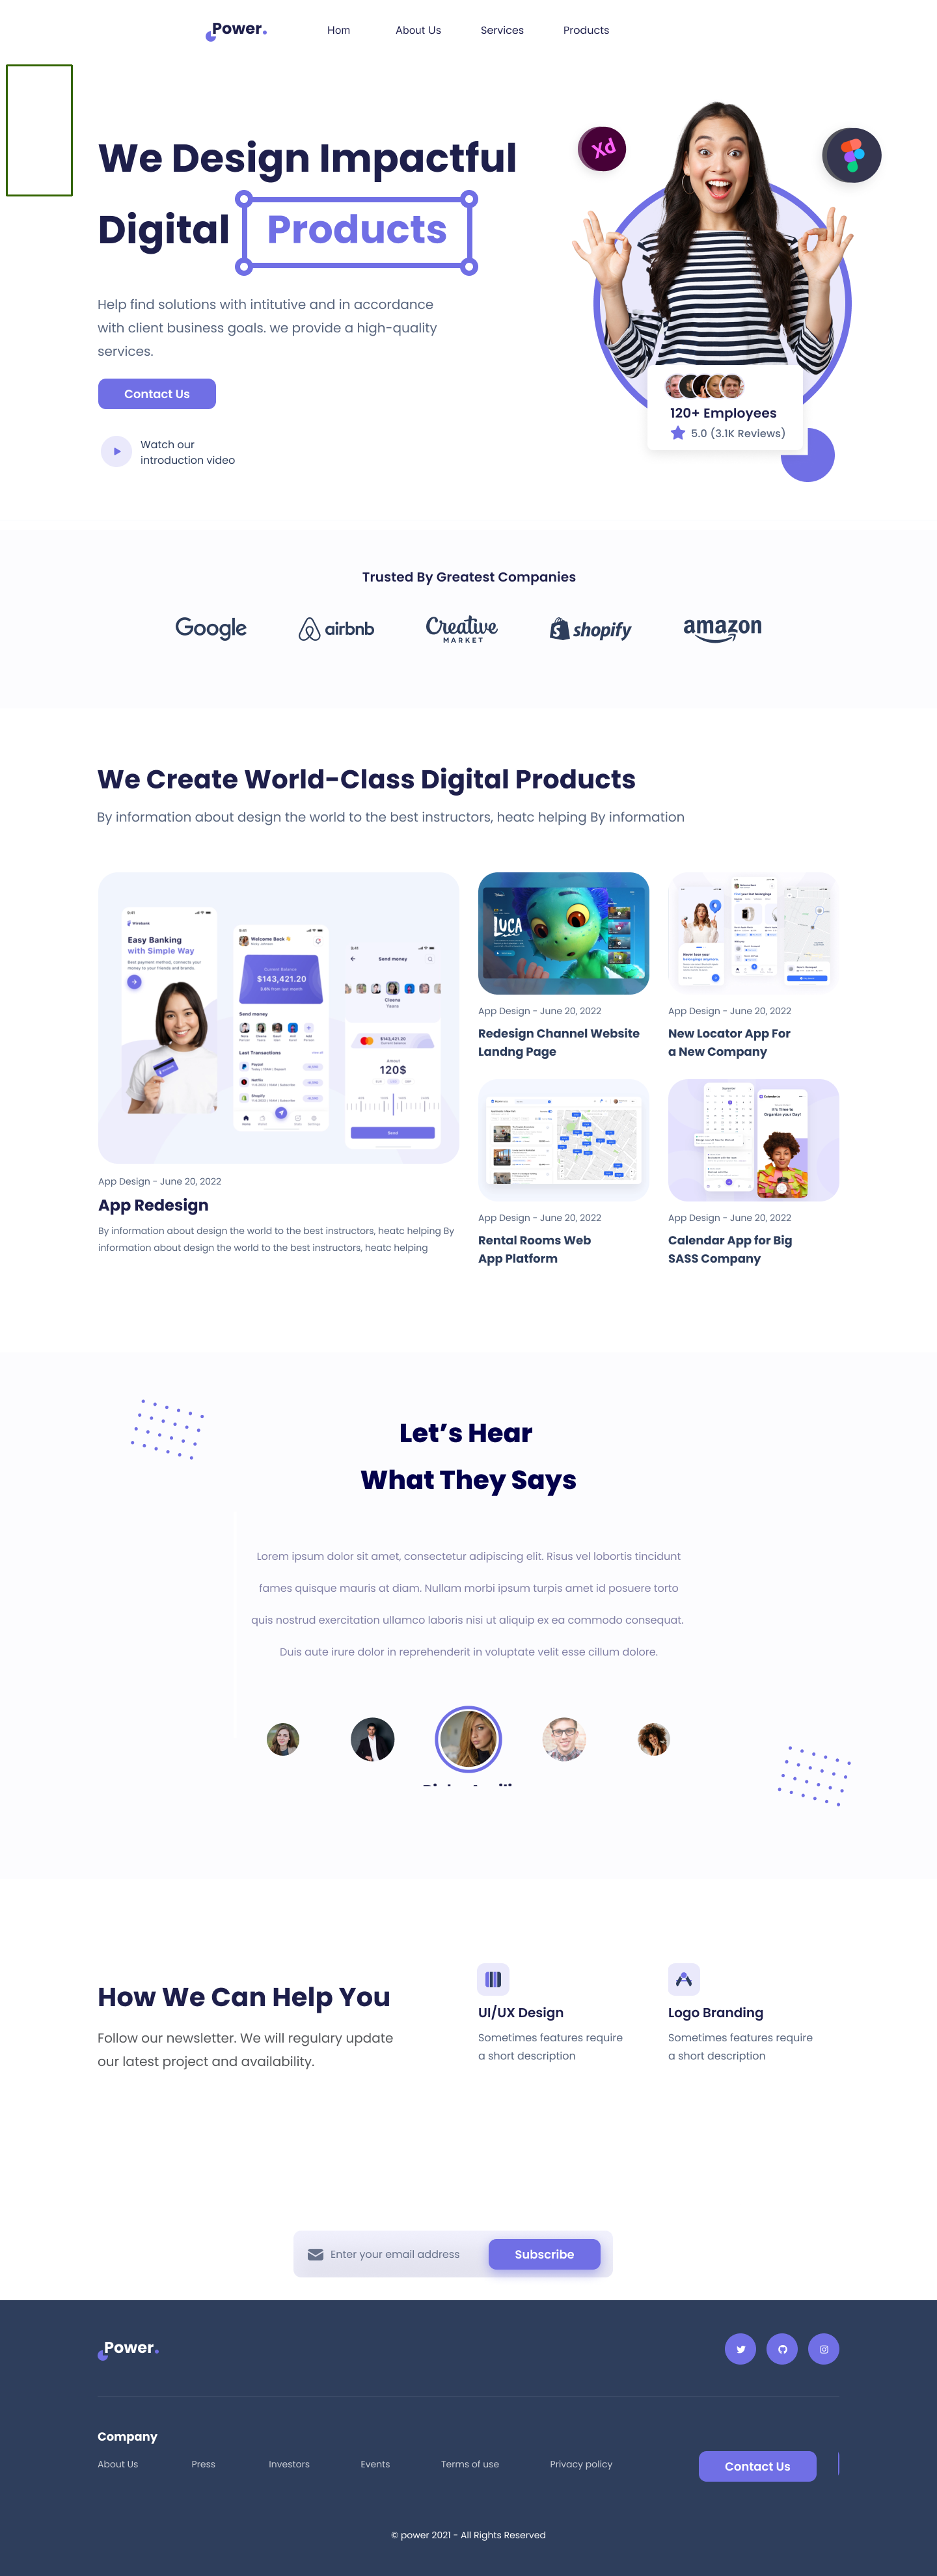

In [ ]:
from google.colab.patches import cv2_imshow
large_image_0 = numpy_array_image_dev
pt_1 = (10, 100) # x , y
pt_2 = (100, 200) # height, width
line_color = (0, 100, 50)  # (B, G, R)
thickness = 2
x1, y1 = 100, 100
x2, y2 = 200, 200
cv2.rectangle(large_image_0, pt_1, (int(pt_1[0]) + int(pt_2[0]), int(pt_1[1]) + int(pt_2[1])), line_color, thickness)

cv2_imshow(large_image_0)

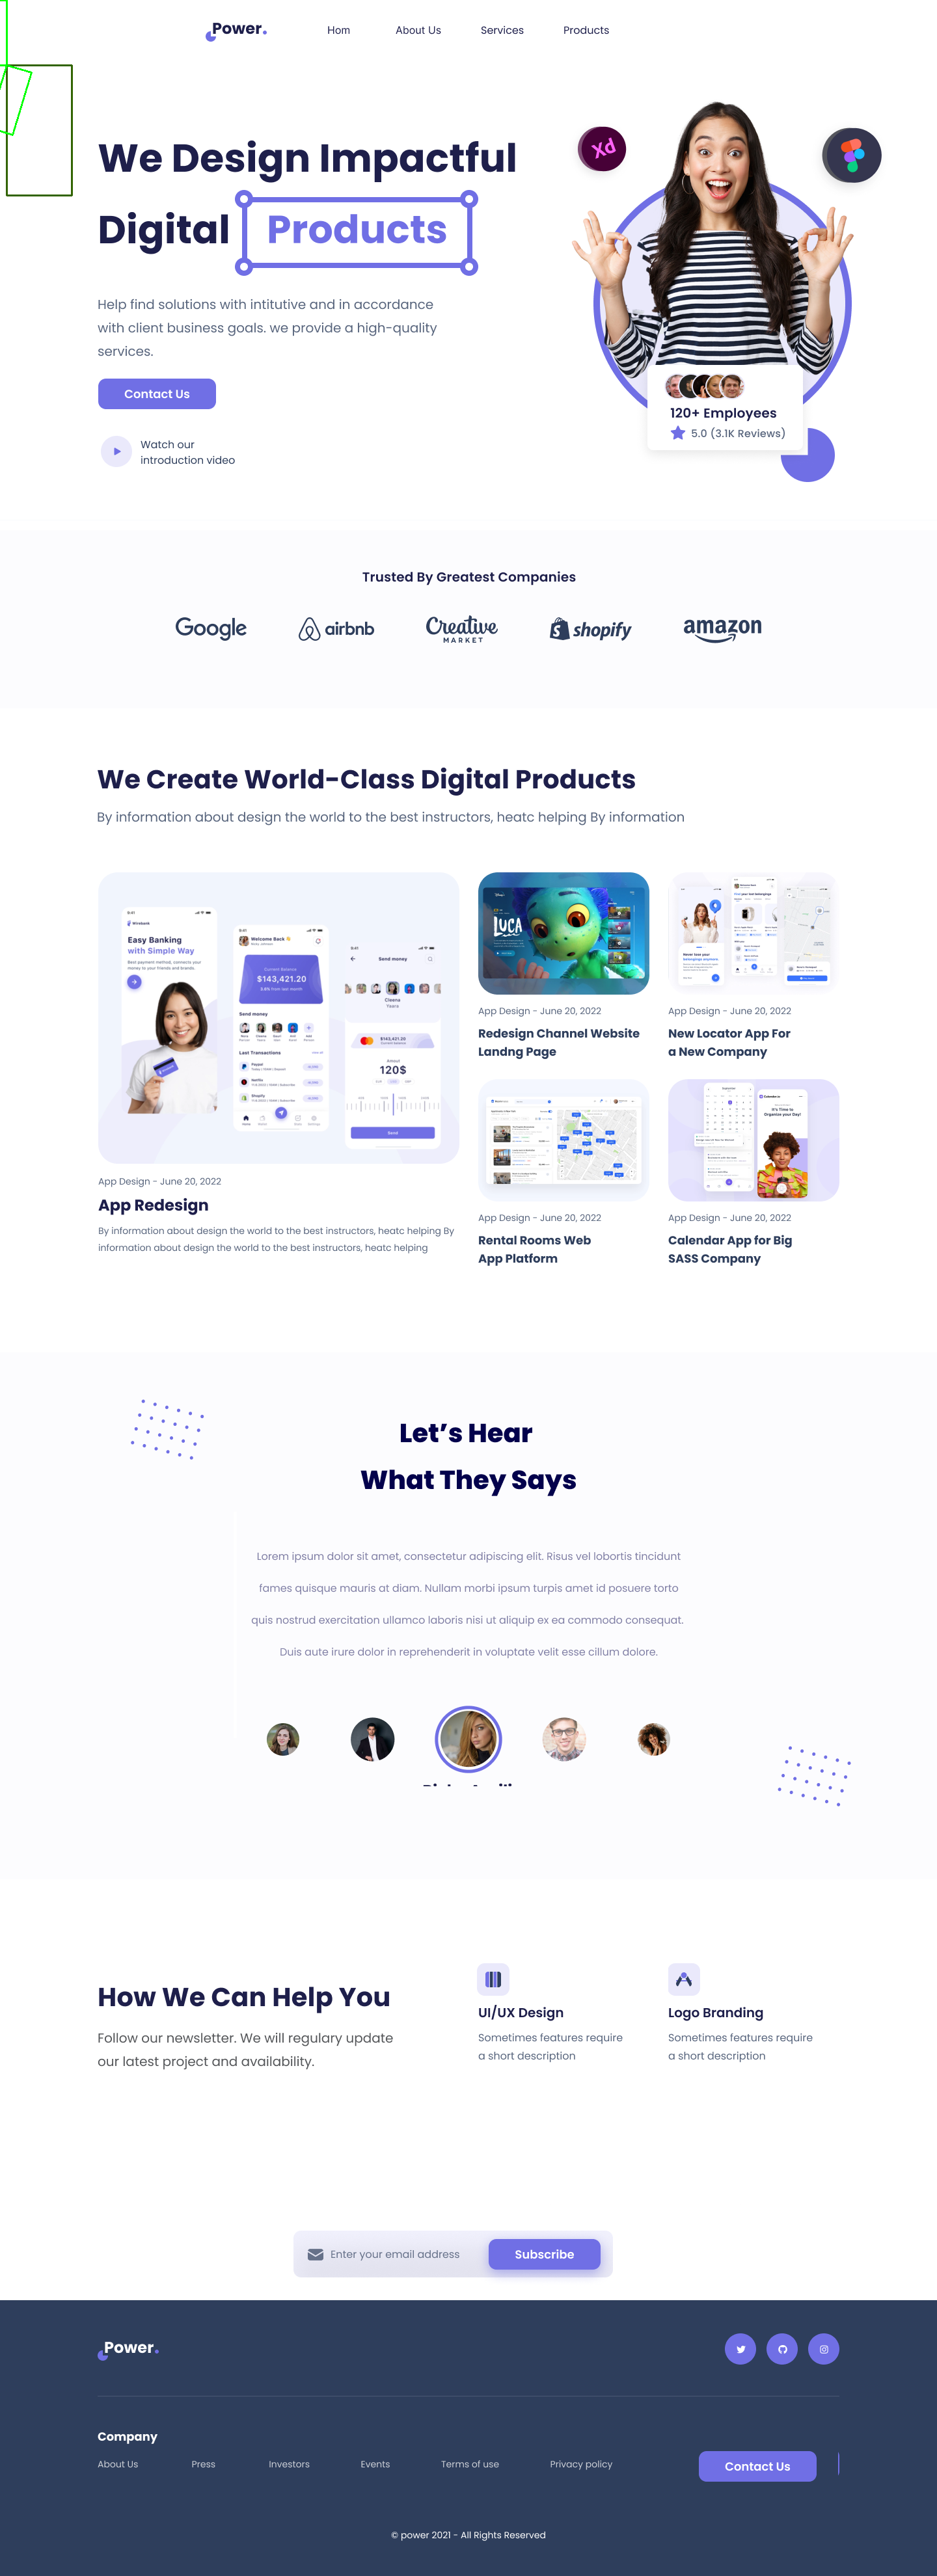

In [ ]:
from google.colab.patches import cv2_imshow

large_image_0 = numpy_array_image_dev

x1, y1 = 10, 100 #x, y
x2, y2 = 50, 200 #width, height

# Define the color of the rectangle in BGR format
color = (0, 255, 0)  # (B, G, R)

# Define the thickness of the rectangle's lines
thickness = 2

# Calculate the center of the rectangle
center = (x1), (y1) #((x1 + x2) // 2, (y1 + y2) // 2)

# Calculate the size of the rectangle
size = (x2 - x1, y2 - y1)

# Rotation angle in degrees
angle_degrees = -17

# Convert angle to radians
angle_radians = np.deg2rad(angle_degrees)

# Define the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1)

# Define the points of the rectangle
points = np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]], dtype=np.float64)

# Translate the rectangle so that its center is at the origin
translated_points = points - center

# Rotate the rectangle
rotated_points = np.dot(rotation_matrix[:, :2], translated_points.T).T + center

# Convert the points to integers
rotated_points = rotated_points.astype(int)

# Draw the rotated rectangle on the image
image = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.polylines(large_image_0, [rotated_points], isClosed=True, color=color, thickness=thickness)


# Display the image with the rotated rectangle
#cv2.imshow('Rotated Rectangle', large_image_0)
cv2_imshow(large_image_0)

In [ ]:
print(data_json)

{'type': 'NODE_CHANGES', 'sessionID': 0, 'ackID': 0, 'nodeChanges': [{'guid': {'sessionID': 0, 'localID': 0}, 'phase': 'CREATED', 'type': 'DOCUMENT', 'name': 'Document', 'visible': True, 'locked': False, 'opacity': 1, 'blendMode': 'PASS_THROUGH', 'transform': {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}, 'mask': False, 'maskType': 'ALPHA'}, {'guid': {'sessionID': 0, 'localID': 1}, 'phase': 'CREATED', 'parentIndex': {'guid': {'sessionID': 0, 'localID': 0}, 'position': '!'}, 'type': 'CANVAS', 'name': 'Design Power Agency', 'visible': True, 'locked': False, 'opacity': 1, 'blendMode': 'PASS_THROUGH', 'transform': {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}, 'mask': False, 'maskType': 'ALPHA', 'backgroundOpacity': 1, 'backgroundColor': {'r': 0.9490196108818054, 'g': 0.9490196108818054, 'b': 0.9490196108818054, 'a': 1}, 'backgroundEnabled': True, 'exportBackgroundDisabled': False, 'editInfo': {'userId': '1260838577738906021', 'lastEditedAt': 1708436875, 'crea

In [ ]:
print(len(data_json["nodeChanges"]))

380


In [ ]:
print(data_json["nodeChanges"])

[{'guid': {'sessionID': 0, 'localID': 0}, 'phase': 'CREATED', 'type': 'DOCUMENT', 'name': 'Document', 'visible': True, 'locked': False, 'opacity': 1, 'blendMode': 'PASS_THROUGH', 'transform': {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}, 'mask': False, 'maskType': 'ALPHA'}, {'guid': {'sessionID': 0, 'localID': 1}, 'phase': 'CREATED', 'parentIndex': {'guid': {'sessionID': 0, 'localID': 0}, 'position': '!'}, 'type': 'CANVAS', 'name': 'Design Power Agency', 'visible': True, 'locked': False, 'opacity': 1, 'blendMode': 'PASS_THROUGH', 'transform': {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}, 'mask': False, 'maskType': 'ALPHA', 'backgroundOpacity': 1, 'backgroundColor': {'r': 0.9490196108818054, 'g': 0.9490196108818054, 'b': 0.9490196108818054, 'a': 1}, 'backgroundEnabled': True, 'exportBackgroundDisabled': False, 'editInfo': {'userId': '1260838577738906021', 'lastEditedAt': 1708436875, 'createdAt': 0}}, {'guid': {'sessionID': 0, 'localID': 2}, 'phase': 'CREA

In [ ]:
def transform_accomulated(transform_0: dict, transform_1: dict) -> dict:
    transform_acc: dict = {}
    for key in transform_0.keys():
        if key in ["m02", "m12"]:
            transform_acc[key] = transform_0[key] + transform_1[key]
        else:
            transform_acc[key] = (
                transform_0[key] if transform_0[key] != 0 else transform_1[key]
            )
    return transform_acc

In [ ]:
# tan = {"m00": 0.95, "m01": 0.3, "m02": 0, "m10": -0.3, "m11": 0.95, "m12": 0}
def scaling_rotation_factor(transform_0: dict) -> float:
    scale_x = transform_0["m00"]
    scale_y = transform_0["m10"]

    tan_x = transform_0["m01"]
    tan_y = transform_0["m11"]

    scale = (scale_x + scale_y) / 2
    rotation_radians = math.atan2(tan_x, tan_y)
    rotation_degrees = math.degrees(rotation_radians)

    rounded_rotation_degrees= round(rotation_degrees)
    return rotation_degrees
    # print(scale)
    # print(rotation_radians)
    # print(rotation_degrees)


# scaling_rotation_factor(tan)

In [ ]:
def rotation_factor(transform_0: dict) -> float:
    scale_x = transform_0["m00"]
    scale_y = transform_0["m10"]

    tan_x = transform_0["m01"]
    tan_y = transform_0["m11"]

    scale = (scale_x + scale_y) / 2
    rotation_radians = math.atan2(tan_x, tan_y)
    rotation_degrees = math.degrees(rotation_radians)

    rounded_rotation_degrees= round(rotation_degrees)
    return rotation_degrees

In [ ]:
def parents_size_transform(
    current_node: dict, data_json: dict, transform_parents_acc: dict
) -> dict:
    print("parents_size_transform")
    parent_guid: dict = current_node.get("parentIndex", {}).get("guid")

    if parent_guid:
        parent_localID: float = parent_guid.get("localID")
        parent_node: dict = next(
            (
                n
                for n in data_json["nodeChanges"]
                if n["guid"]["localID"] == parent_localID
            ),
            None,
        )
        # print("transform_parents_acc", transform_parents_acc)
        if parent_node:
            parent_size = parent_node.get("size", {"x": 0, "y": 0})
            parent_transform = parent_node.get(
                "transform",
                {"m00": 0, "m01": 0, "m02": 0, "m10": 0, "m11": 0, "m12": 0},
            )
            transform_parents_acc = transform_accomulated(
                transform_parents_acc, parent_transform
            )

            # print(f"Parent localID: {parent_localID}, Size (x, y): ({parent_size['x']}, {parent_size['y']}), Transform (m02, m12): ({parent_transform['m02']}, {parent_transform['m12']})")
            return parents_size_transform(parent_node, data_json, transform_parents_acc)
    print("transform_parents_acc", transform_parents_acc)
    return transform_parents_acc

In [ ]:
def current_node_size_transform(
    current_node: dict, data_json: dict, transform_parents: dict
) -> tuple:
    print("current_node_size_transform")
    size: dict = current_node.get("size", {"x": 0, "y": 0})
    transform: dict = current_node.get(
        "transform", {"m00": 0, "m01": 0,
                      "m02": 0, "m10": 0, "m11": 0, "m12": 0}
    )

    return size, transform

In [ ]:
def mark_image_with_box_dict(image: Image, transform: dict, size: dict, color="red"):
    width, height = size["x"], size["y"]
    x, y = transform["m02"], transform["m12"]
    # image = Image.open(image_path)
    bounding_box = (x, y, x + width, y + height)
    outline_color = color
    draw = ImageDraw.Draw(image)
    # Draw a rectangle on the image
    draw.rectangle(bounding_box, outline=outline_color, width=2)
    return image

In [ ]:
def crop_image_area(
    image: Image.Image, x: float, y: float, width: float, height: float
) -> Image.Image:
    # image = Image.open(image_path)
    # The crop method takes the region to crop as (left, upper, right, lower)
    cropped_image: Image.Image = image.crop((x, y, x + width, y + height))
    return cropped_image

In [ ]:
# preprocess to eliminate blank images in "temp_match_location_finder" function
def preprocess_image(image_cv: np.ndarray) -> np.ndarray:
    gray_image_cv: np.ndarray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
    # Calculate the histogram
    calc_hist = cv2.calcHist([gray_image_cv], [0], None, [256], [0, 256])
    # Check if the image is predominantly white or black
    if calc_hist[255] > 0.9 * np.prod(gray_image_cv.shape):
        # If the image is mostly white, return None
        return None
    elif calc_hist[0] > 0.9 * np.prod(gray_image_cv.shape):
        # If the image is mostly black, return None
        return None
    # If all pixels are of same color
    elif np.all(np.isclose(calc_hist, [np.prod(gray_image_cv.shape)], atol=100)):
        # If all pixels have the same color, return None
        return None
    else:
        # Otherwise, return the original image
        return image_cv

In [ ]:
def temp_match_location_finder(
    developed_image: np.ndarray, cropped_image: Image, threshold_lvl: float
):
    print("temp_match_location_finder")

    large_image = developed_image
    cropped_image_cv_01: np.ndarray = np.array(cropped_image)

    cropped_image_cv_0 = preprocess_image(cropped_image_cv_01)
    if cropped_image_cv_0 is None:
        print("Cropped image is blank or contains only a single solid color.")
        return [], None

    cropped_image_cv = cropped_image_cv_0

    # Convert cropped image to grayscale
    cropped_gray = cv2.cvtColor(cropped_image_cv, cv2.COLOR_BGR2GRAY)

    # Convert large image to grayscale
    large_gray = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)

    # Perform template matching
    result = cv2.matchTemplate(large_gray, cropped_gray, cv2.TM_CCOEFF_NORMED)
    # Calculate the correlation using cross-correlation

    # Specify a threshold to find the best match
    threshold = 0.9  # threshold_lvl
    locations = np.where(result >= threshold)

    return locations, cropped_image_cv

In [ ]:
def rectangle_rotation(input_image_cv:np.ndarray, angle_pt, pt_1, pt_2, line_color, thickness:int=..., line_type:int=..., shift:int=...):
    print("rectangle_rotation")

    large_image_0 = numpy_array_image_dev
    # pt_1 = (10, 100) # x , y
    # pt_2 = (100, 200) # height, width

    x1, y1 = (int(pt_1[0]), int(pt_1[1]))#(100, 100) #x, y
    x2, y2 = (int(pt_2[1]), int(pt_1[0]))#(200, 200) #width, height

    mrk_color = line_color#(0, 100, 50)  # (B, G, R)

    # Define the thickness of the rectangle's lines
    thickness = 2

    # Calculate the center of the rectangle
    center = (x1), (y1) #((x1 + x2) // 2, (y1 + y2) // 2)

    # Calculate the size of the rectangle
    size = (x2 - x1, y2 - y1)

    # Rotation angle in degrees
    angle_degrees = angle_pt #180
    ##if angle_degrees != 0
    # Convert angle to radians
    angle_radians = np.deg2rad(angle_degrees)

    #print("CENTER",center)
    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1)

    # Define the points of the rectangle
    points = np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]], dtype=np.float64)

    # Translate the rectangle so that its center is at the origin
    translated_points = points - center

    # Rotate the rectangle
    rotated_points = np.dot(rotation_matrix[:, :2], translated_points.T).T + center

    # Convert the points to integers
    rotated_points = rotated_points.astype(int)

    # Draw the rotated rectangle on the image
    # image = np.zeros((300, 300, 3), dtype=np.uint8)
    cv2.polylines(large_image_0, [rotated_points], isClosed=True, color=mrk_color, thickness=thickness)



    #cv2.rectangle(input_image_cv, pt_1, (int(pt_1[0]) + int(pt_2[0]), int(pt_1[1]) + int(pt_2[1])), line_color, thickness)


In [ ]:
def mark_numpy_matched(
    locations,
    rotation_angle:int,
    developed_image: np.ndarray,
    cropped_image_cv: Union[None, np.ndarray],
    color_mark: tuple[int, int, int],
    text: str
):
    large_image = developed_image


    if 1 == 1:#np.any([arr.size != 0 for arr in locations]):

        for pt in zip(*locations[::-1]):
            print(type(pt))
            print(pt)
            print(cropped_image_cv.shape)
            rectangle_rotation(large_image, rotation_angle , pt, cropped_image_cv.shape, color_mark, 1)
            # cd = cv2.rectangle(
            #     large_image,
            #     pt,
            #     (pt[0] + cropped_image_cv.shape[1],
            #      pt[1] + cropped_image_cv.shape[0]),
            #     (0, 255, 0),
            #     2,
            # )

            start_x, start_y = pt[0], pt[1]
            label_text = f"Allignment {text}"
            # Adjust vertical position
            label_position = (start_x, start_y - 10)
            cv2.putText(
                large_image,
                label_text,
                label_position,
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                color_mark,
                2,
            )
    return large_image

In [ ]:
def missing_object_demo(locations: tuple[np.ndarray, ...], large_image):
    empty_locations: tuple = (
        np.array([], dtype=np.int64),
        np.array([], dtype=np.int64),
    )
    if locations[0].size == 0 and locations[1].size == 0:
        print("no object match found")

    if np.all([not arr.size for arr in locations]):
        print("no value")
        large_image_pil = Image.fromarray(large_image)
        draw = ImageDraw.Draw(large_image_pil)
        draw.rectangle([x, y, x + width, y + height], outline=marker_color, width=3)
        # large_image_pil = mark_image_with_box(large_image_pil, x, y, width, height, color=marker_color)

In [ ]:
def missing_object(developed_image, x, y, width, height, rotation_angle:int, color_mark: tuple[int, int, int], text: str):
    print("missing_object")

    large_image = developed_image
    pt = (int(x), int(y))
    cd = cv2.rectangle(
        large_image, pt, (pt[0] + int(width), pt[1] + int(height)), color_mark, 2)

    start_x, start_y = pt[0], pt[1]
    label_text = f"Missing {text}"
    label_position = (start_x, start_y - 10)  # Adjust vertical position
    cv2.putText(
        large_image,
        label_text,
        label_position,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        color_mark,
        1,
    )
    return large_image

In [ ]:
def moved_object(locations: tuple[np.ndarray, ...], large_image):
    print("moved_object")

In [ ]:
color_def: tuple[int, int, int] = (0, 0, 0)
color_red: tuple[int, int, int] = (255, 0, 0)
color_green: tuple[int, int, int] = (0, 255, 0)
color_blue: tuple[int, int, int] = (0, 0, 255)
marker_colors = [color_def, color_red, color_green, color_blue]

In [ ]:
node_mapping: dict = {node['guid']['localID']: node for node in data_json['nodeChanges']}
# print("", node_mapping)

transform: dict = {'m00': 0, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 0, 'm12': 0}
large_image_cv = numpy_array_image_dev
marker_color: tuple[int, int, int] = (0, 200, 0)

for node in data_json['nodeChanges'][96:140]:
    # print(node)
    print("#####node['guid']", node['guid']['localID'])
    # == "FILL":
    if 'styleType' in node and node['styleType'] in ["FILL", "EFFECT"]:
        print("----node['guid']", node['guid']['localID'])
    else:
        # if cropped_image.size != (0, 0):
        #     print("cropped_image.size")
        # get_parent_info(node, data_json, transform)
        # print("---",get_parent_info(node, data_json))
        parents_transform: dict = parents_size_transform(
            node, data_json, transform)
        print(node['guid']['localID'], "?????????", parents_transform)
        node_size, node_transform = current_node_size_transform(
            node, data_json, parents_transform)
        node_acc_transform = transform_accomulated(
            node_transform, parents_transform)

        width, height = node_size['x'], node_size['y']
        x, y = node_acc_transform['m02'], node_acc_transform['m12']
        if all(node_size[key] != 0 for key in ['x', 'y']):  # initial chek if object exist

            croped_image = crop_image_area(image_des, x, y, width, height)
            #display(croped_image)
            location, crope = temp_match_location_finder(
                large_image_cv, croped_image, 0.9)

            node_id = str(node['guid']['localID'])
            rotation_angle = int(rotation_factor(node_acc_transform)) #Degree is in float
            print(node_id, "-------", location)
            if location != []:
                print("location is blank color []")
                if np.any([arr.size != 0 for arr in location]):
                    # if x not in location[1] and y not in location[0]:
                    large_image_cv = mark_numpy_matched(
                        location, rotation_angle, large_image_cv, crope, marker_colors[2], str(node_id))

                if np.any([arr.size == 0 for arr in location]):
                    large_image_cv = missing_object(
                        large_image_cv, x, y, width, height, rotation_angle, marker_colors[1], str(node_id))

                if x not in location[1] and y not in location[0]:
                    print("test", location[0])

            # for pt in zip(*location[::-1]):
            #     if all(pt_val == 0 for pt_val in pt):
            #         print("Both values are 0")
            #     else:
            #         print("At least one value is not 0")

            # large_image_cv = mark_numpy_matched(
            #     location, large_image_cv, crope, (0, 200, 0), str(node['guid']['localID']))
            # marked_image = mark_image_with_box_dict(
            #     image_des, node_acc_transform, node_size)

        print(width, height)
        print("-------", x, y)
        print(location)
        # print(crope.shape)

#####node['guid'] 513
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
transform_parents_acc {'m00': 1, 'm01': 0, 'm02': 1051.11865234375, 'm10': 0, 'm11': 1, 'm12': 952.75}
513 ????????? {'m00': 1, 'm01': 0, 'm02': 1051.11865234375, 'm10': 0, 'm11': 1, 'm12': 952.75}
current_node_size_transform
temp_match_location_finder
513 ------- (array([953, 954]), array([1071, 1071]))
location is blank color []
<class 'tuple'>
(1071, 953)
(20, 25, 4)
rectangle_rotation
<class 'tuple'>
(1071, 954)
(20, 25, 4)
rectangle_rotation
test [953 954]
24.79229164123535 20.478689193725586
------- 1071.3281555175781 952.9860655665398
(array([953, 954]), array([1071, 1071]))
#####node['guid'] 514
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
parents_size_transform
transform_parents_acc {'m00': 1, 'm01': 0, 'm

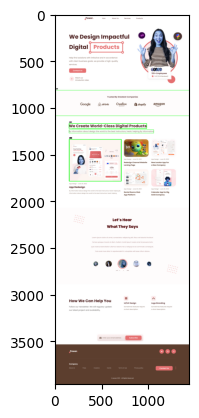

In [ ]:
# display(large_image_cv)
plt.imshow(large_image_cv)
plt.axis("on")  # Optional: to not display axis for our image
plt.show()

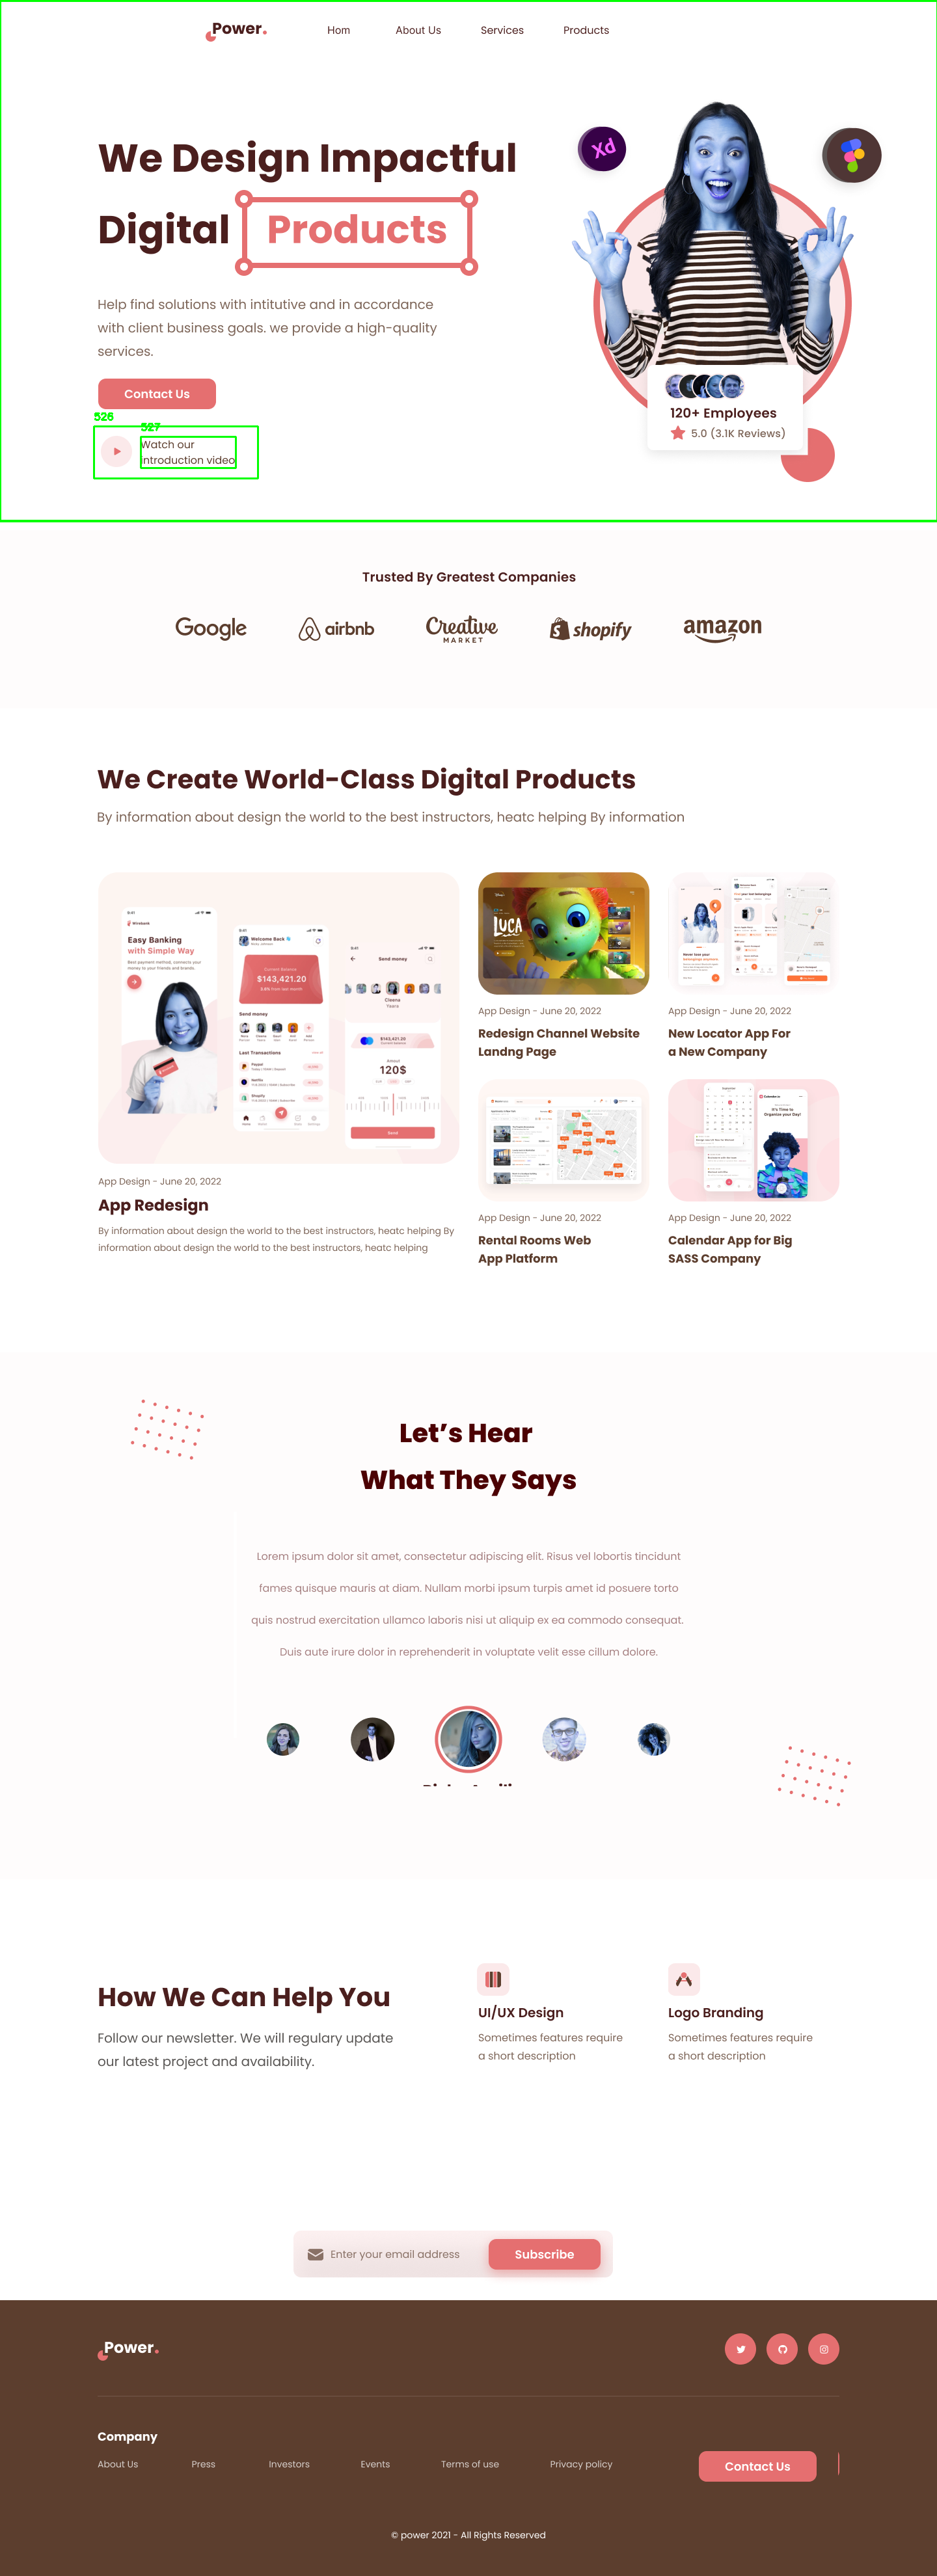

In [ ]:
large_image_cv_float32 = numpy_array_image_dev.astype(np.float32)
pil_image = Image.fromarray(large_image_cv_float32.astype(np.uint8))

# cmyk_image = pil_image.convert("CMYK")

# Display or save the CMYK image
# cmyk_image.show()
display(pil_image)

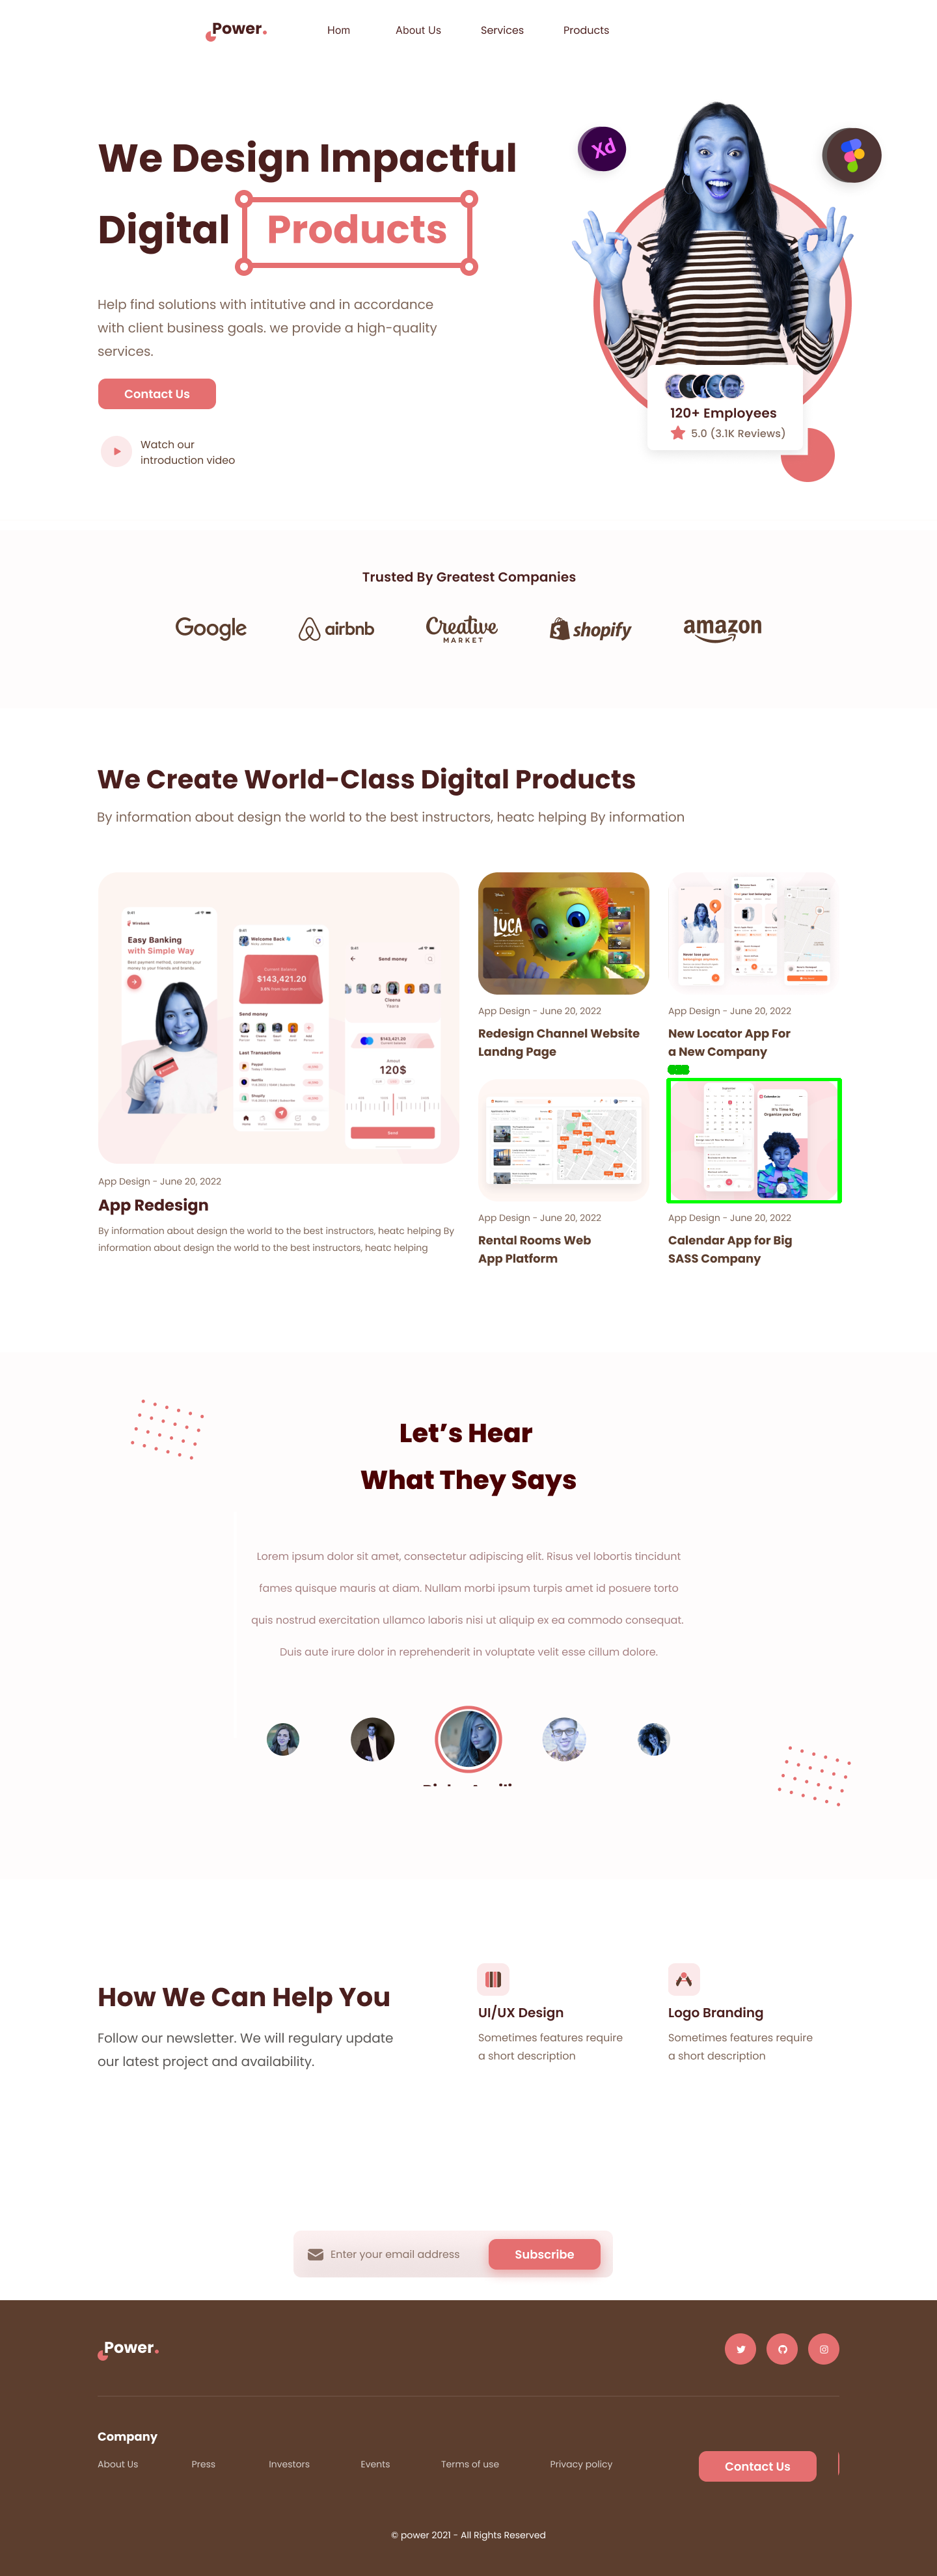

In [ ]:
large_image_pil = Image.fromarray(large_image_cv)  # numpy to PIL image
display(large_image_pil)

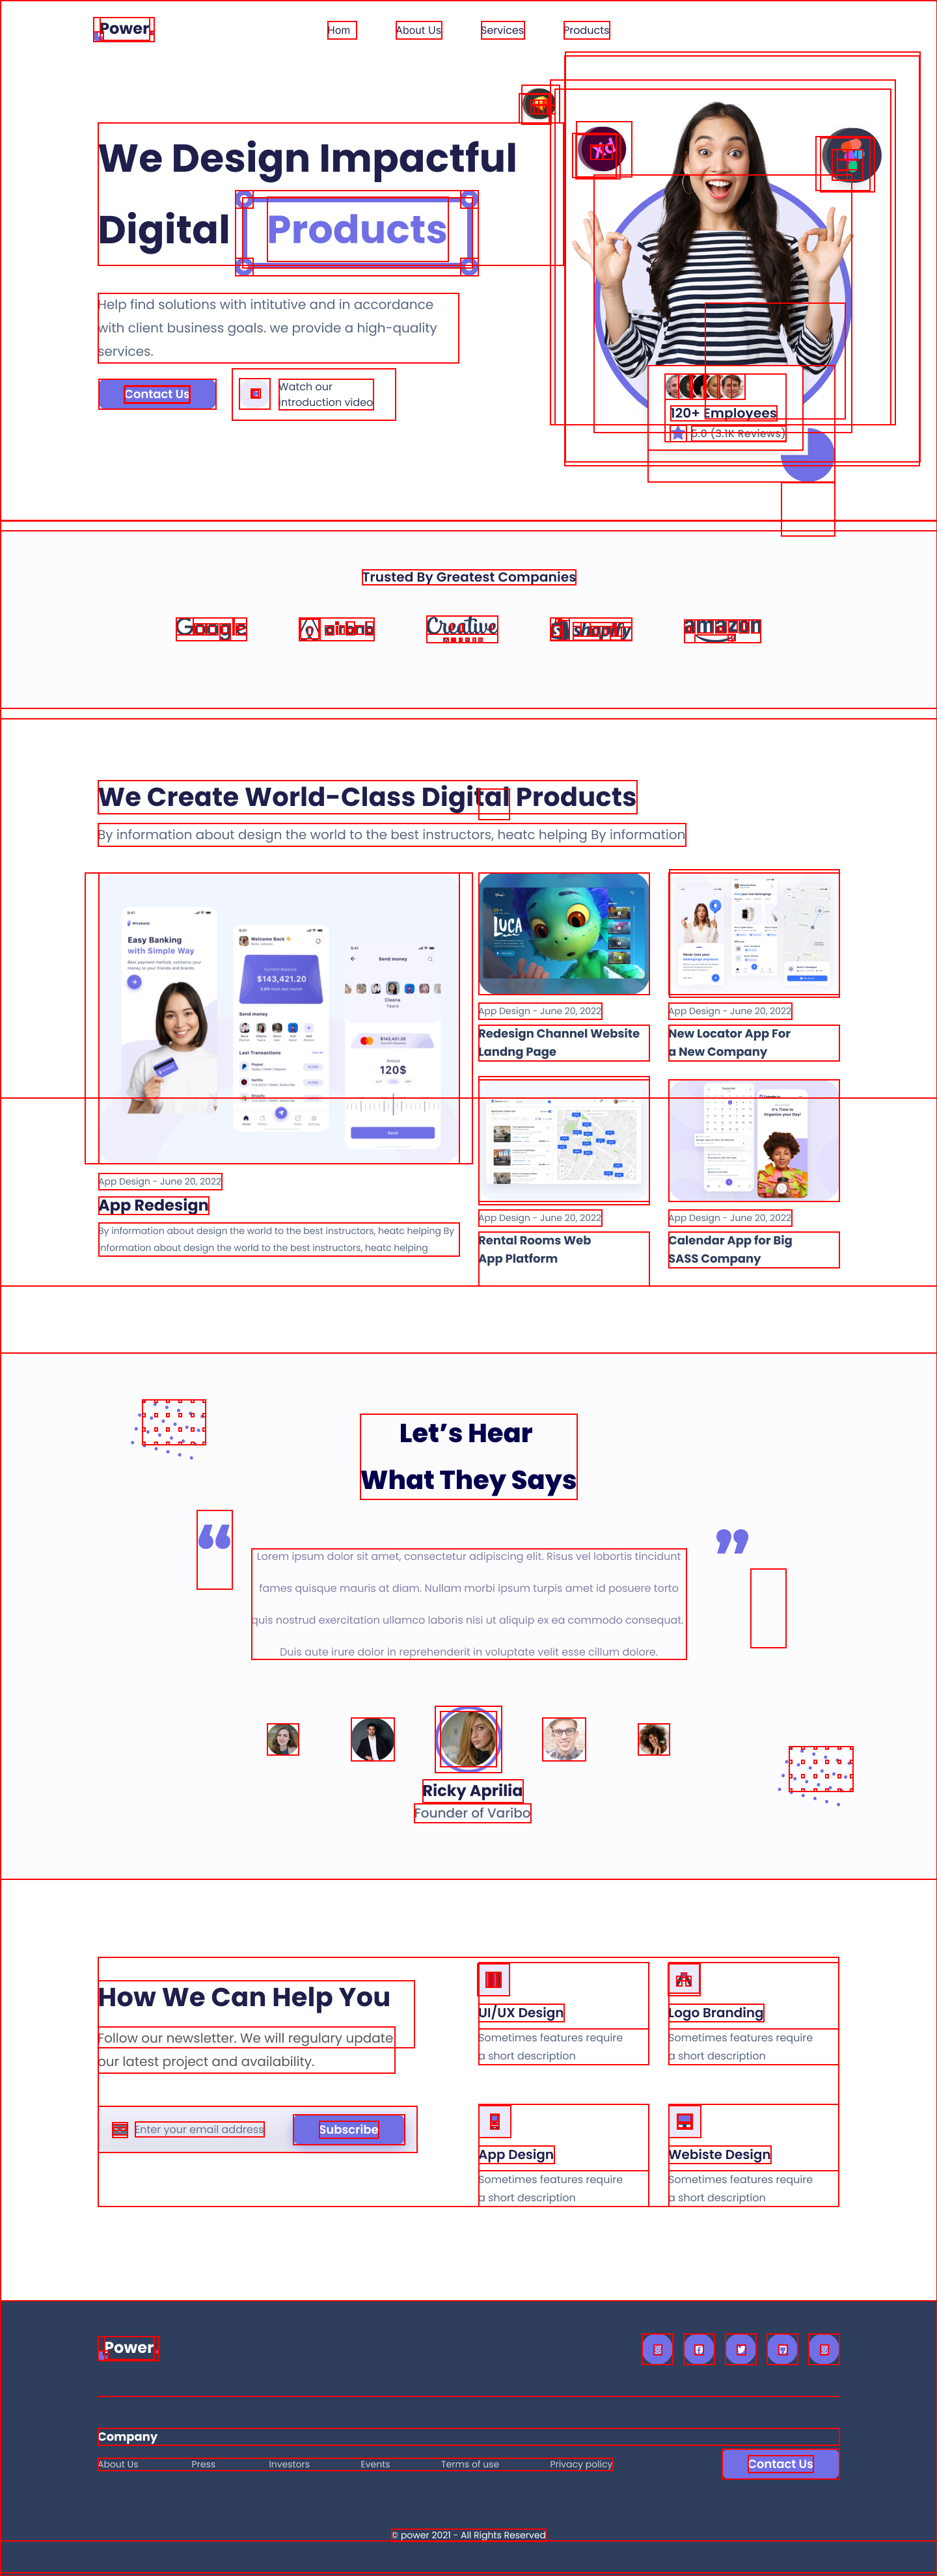

In [ ]:
display(marked_image)

In [ ]:
def get_parent_info(node: dict, data_json: dict, transform_parents_acc: dict):
    parent_guid: dict = node.get("parentIndex", {}).get("guid")

    if parent_guid:
        parent_localID: float = parent_guid.get("localID")
        parent_node: dict = next(
            (
                n
                for n in data_json["nodeChanges"]
                if n["guid"]["localID"] == parent_localID
            ),
            None,
        )
        if parent_node:
            parent_size = parent_node.get("size", {"x": 0, "y": 0})
            parent_transform = parent_node.get(
                "transform",
                {"m00": 0, "m01": 0, "m02": 0, "m10": 0, "m11": 0, "m12": 0},
            )
            print(
                f"Parent localID: {parent_localID}, Size (x, y): ({parent_size['x']}, {parent_size['y']}), Transform (m02, m12): ({parent_transform['m02']}, {parent_transform['m12']})"
            )
            get_parent_info(parent_node, data_json)

In [ ]:
def extract_transform_and_size(data, local_id, parent_transform=None):
    for node in data["nodeChanges"]:
        if node["guid"]["localID"] == local_id:
            # Extract transform and size values
            transform = node["transform"]
            # size = node["size"]
            size = node.get("size", {"x": 0, "y": 0})
            print(f"Transform for localID {local_id}: {transform}")
            print(f"Size for localID {local_id}: {size}")

            # Check if parentIndex exists and recursively backtrack
            if "parentIndex" in node:
                parent_guid = node["parentIndex"]["guid"]
                parent_local_id = parent_guid["localID"]
                print(f"Parent for localID {local_id}: {parent_local_id}")

                # Call the function recursively to backtrack parent
                extract_transform_and_size(data, parent_local_id, transform)
            else:
                print(f"No parent for localID {local_id}")

            break


# Test the function
extract_transform_and_size(data_json, 25)

Transform for localID 25: {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}
Size for localID 25: {'x': 100, 'y': 100}
Parent for localID 25: 26
Transform for localID 26: {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}
Size for localID 26: {'x': 0, 'y': 0}
Parent for localID 26: 0
Transform for localID 0: {'m00': 1, 'm01': 0, 'm02': 0, 'm10': 0, 'm11': 1, 'm12': 0}
Size for localID 0: {'x': 0, 'y': 0}
No parent for localID 0
